# Stage Analysis

In this notebook I analyze the time the program takes for each stage of the algorithm.
Here you will find the 3 versions:

1. Sequential
2. Parallel THR (Native C++ Threads)
3. Parallel FF (using Fast Flow Lib)


In [1]:
from b_tools.preprocess import get_standardized_measures

### Sequential (SEQ)

In [2]:
# Choose the file
DATASET=20

In [3]:
seq = get_standardized_measures(f"results/sequential_{DATASET}.csv")

In [4]:
seq.describe()

,READ,FREQCALC,HUFFBUILD,MAP,WRITE,TOTAL
count,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,2.000000e+00,2.000000e+00
mean,2.650894e+07,7.433043e+08,230192.000000,1.720253e+09,1.665607e+08,2.656857e+09
std,1.097930e+06,4.649275e+06,13635.847168,3.640504e+06,5.960891e+07,5.748857e+07
min,2.573258e+07,7.400168e+08,220550.000000,1.717679e+09,1.244109e+08,2.616207e+09
25%,2.612076e+07,7.416605e+08,225371.000000,1.718966e+09,1.454858e+08,2.636532e+09
50%,2.650894e+07,7.433043e+08,230192.000000,1.720253e+09,1.665607e+08,2.656857e+09
75%,2.689711e+07,7.449481e+08,235013.000000,1.721540e+09,1.876357e+08,2.677182e+09
max,2.728529e+07,7.465918e+08,239834.000000,1.722827e+09,2.087106e+08,2.697508e+09


In [5]:
seq_stages = list(seq.columns)
seq_stages.remove('TOTAL')
seq_means = [seq[stage].mean() for stage in seq_stages]

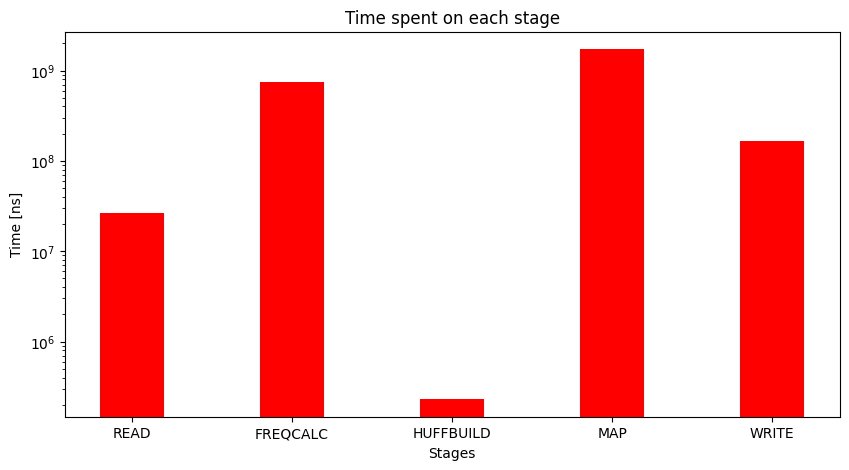

In [6]:
import matplotlib.pyplot as plt 
 
fig = plt.figure(figsize = (10, 5))
plt.bar(seq_stages, seq_means, color='red', width=0.4)
 
plt.xlabel("Stages")
plt.ylabel("Time [ns]")
plt.yscale('log')
plt.title("Time spent on each stage")
plt.show()

## Parallel (THR)

In [7]:
thr = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [8]:
def plot_for_p(p_degree, data):
    thr_data = data[data['P_DEGREE'] == p_degree]
    thr_stages = list(thr_data.columns)
    thr_stages.remove('TOTAL')
    thr_stages.remove('P_DEGREE')
    thr_means = [thr_data[stage].mean() for stage in thr_stages]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(thr_stages, thr_means, color='blue', width=0.4)
    plt.xlabel("Stages")
    plt.ylabel("Time [ns]")
    plt.yscale('log')
    plt.title("Time spent on each stage")
    plt.show()

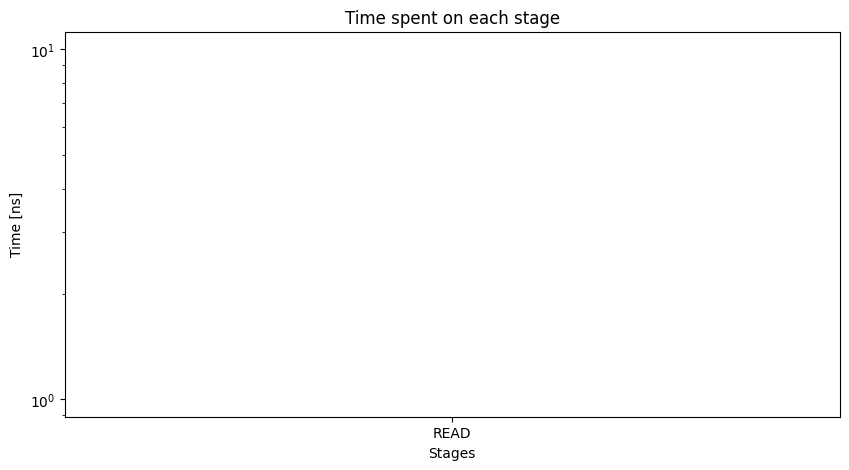

In [9]:
plot_for_p(5, thr)

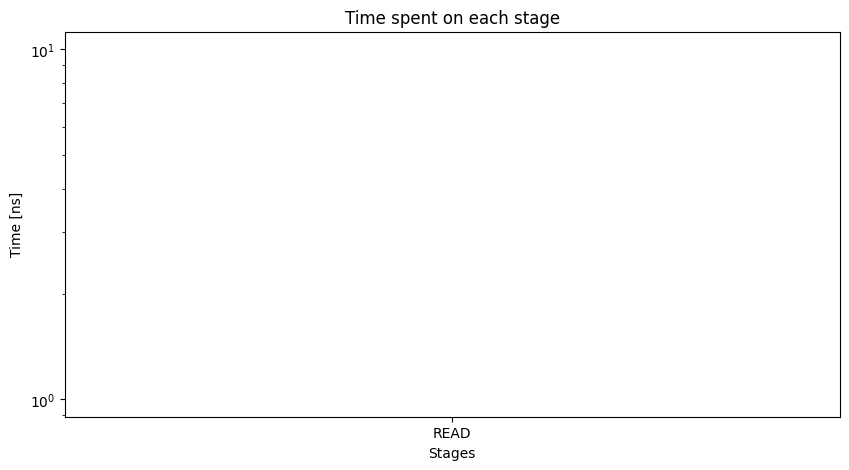

In [10]:
plot_for_p(9, thr)

In [11]:
thr[thr['TOTAL'] == thr['TOTAL'].max()]

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,WRITE,TOTAL
1,1,35245793,794508091,221739,5327166919,204194668,6361337210
